In [19]:
import galpy
import numpy as np
import matplotlib.pyplot as plt
import StreamModel as sm
from galpy.orbit import Orbit
from galpy.potential import NFWPotential
from astropy import units

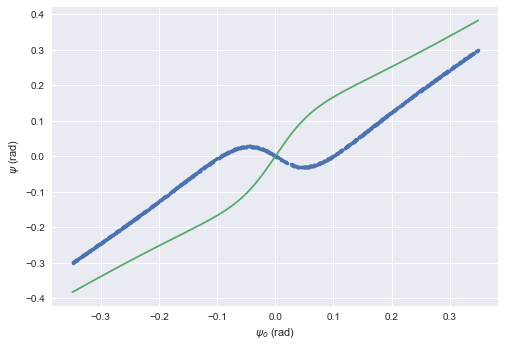

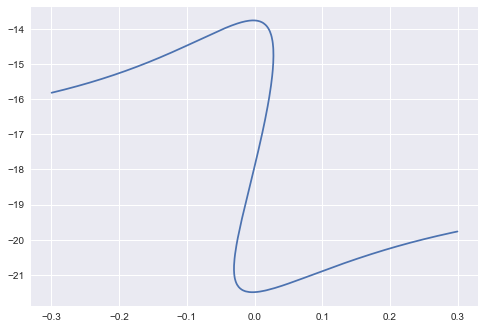

In [68]:
mass = 1.e8
rstream = 9800.
rsub = 625.
impact = 0.
subvel = [150.,0.,0.]
nstars = 1000
sigmav = 0.
std = [[0.,0.,0.],[0.,0.,0.]]

teststream = sm.Stream(mass,rstream,rsub,impact,subvel,450.)
stream = sm.MessyStreamData(mass,rstream,rsub,impact,subvel,0.,nstars,sigmav,std)
psi0 = stream.psi0
vkick = stream.calc_dv(psi0)
vkick[1] = vkick[1]+10.

nfwp= NFWPotential(normalize=1.,a=14./10.)
t = np.linspace(0,450,10000)*units.Myr

#[R,vR,vT(,z,vz,phi)]
#[ro,v'_x,v'_y,0.,v'_z,,psi_0]

psi = np.zeros(nstars)
vx = np.zeros(nstars)

for i in range(len(psi0)):
    o = Orbit(vxvv=[rstream*units.pc,vkick[0][i]*units.km/units.s,vkick[1][i]*units.km/units.s,0.*units.pc,vkick[2][i]*units.km/units.s,psi0[i]*units.rad])
    o.integrate(t,nfwp)
    psi[i] = o.phi(450*units.Myr)
    vx[i] = o.vR(450*units.Myr)
    
centrepsi = psi[np.argmin(np.abs(psi0))]
psi = psi-centrepsi

plt.figure()
plt.plot(psi0,psi,'.')
plt.plot(teststream.psi0,teststream.psi)
plt.ylabel(r'$\psi$ (rad)')
plt.xlabel(r'$\psi_o$ (rad)')
#plt.savefig('PsiIntegratedOrbit.png')

plt.figure()
plt.plot(psi,vx)

plt.show()